In [ ]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [1]:
!pip install vaderSentiment

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 12})


In [3]:
# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_TikTok_comments3.csv')[['Lemmatized_Comments']]

In [4]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()




In [5]:
def analyze_sentiment(Lemmatized_Comments):
    # Check if input is a list and join it into a string
    if isinstance(Lemmatized_Comments, list):
        text = " ".join(Lemmatized_Comments)
    else:
        text = Lemmatized_Comments
    # Get sentiment scores
    scores = analyzer.polarity_scores(text)
    return scores


In [6]:
# Function to analyze sentiment
def analyze_sentiment(Lemmatized_Comments):
    # Get sentiment scores
    scores = analyzer.polarity_scores(Lemmatized_Comments)
    return scores

# Apply sentiment analysis to each comment
df['vader_sentiment'] = df['Lemmatized_Comments'].apply(analyze_sentiment)

In [7]:
# Verify that the custom values are in the lexicon
print("Custom Lexicon Check:")
for word in ['pretty', 'stunning', 'plastic', 'purchase', 'sustainablepackaging', 'talented', 'wait', 'alternative']:
    print(f"{word}: {analyzer.lexicon.get(word)}")


Custom Lexicon Check:
pretty: 2.2
stunning: 1.6
plastic: None
purchase: None
sustainablepackaging: None
talented: 2.3
wait: None
alternative: None


In [8]:
# Extract specific sentiment scores
df['compound'] = df['vader_sentiment'].apply(lambda x: float(x['compound'])) # Overall sentiment score # Convert to float
df['pos'] = df['vader_sentiment'].apply(lambda x: x['pos'])  # Positive sentiment score
df['neg'] = df['vader_sentiment'].apply(lambda x: x['neg'])  # Negative sentiment score
df['neu'] = df['vader_sentiment'].apply(lambda x: x['neu'])  # Neutral sentiment score

In [9]:
print(df[['Lemmatized_Comments', 'vader_sentiment']])

                                    Lemmatized_Comments  \
0     jojoba oil instead olive oil jojoba mean clean...   
1                                  throw washer after ?   
2        magic makeup eraser towel last year need water   
3                                   makeup eraser cloth   
4         esthetician try almond oil jojoba oil instead   
...                                                 ...   
2254                                           love elf   
2255                                          thank yes   
2256                                           pacifica   
2257       elf concealer forever chemical stay away elf   
2258                   could please share alternative ?   

                                        vader_sentiment  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4

In [10]:
# Test VADER sentiment analysis with custom words
test_sentence = "This product is stunning and crueltyfree and not plastic."
test_scores = analyzer.polarity_scores(test_sentence)
print("Test Sentence Sentiment Scores:", test_scores)


Test Sentence Sentiment Scores: {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.3818}


In [11]:
# Determine dominant polarity
def VADER_Polarity(row):
    if row['pos'] > row['neg'] and row['pos'] > row['neu']:
        return 'positive'
    elif row['neg'] > row['pos'] and row['neg'] > row['neu']:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to determine the dominant polarity
df['VADER_Polarity'] = df.apply(VADER_Polarity, axis=1)


In [12]:
print(df[['Lemmatized_Comments', 'vader_sentiment', 'VADER_Polarity']])

                                    Lemmatized_Comments  \
0     jojoba oil instead olive oil jojoba mean clean...   
1                                  throw washer after ?   
2        magic makeup eraser towel last year need water   
3                                   makeup eraser cloth   
4         esthetician try almond oil jojoba oil instead   
...                                                 ...   
2254                                           love elf   
2255                                          thank yes   
2256                                           pacifica   
2257       elf concealer forever chemical stay away elf   
2258                   could please share alternative ?   

                                        vader_sentiment VADER_Polarity  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...        neutral  
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...        neutral  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...        neutral  

In [13]:
print(df['compound'].head())
print(df['compound'].apply(type).unique())  # Check the types of all entries

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: compound, dtype: float64
[<class 'float'>]


In [14]:
print(df['compound'].unique())

[ 0.      0.6369  0.4404 -0.3182  0.8053 -0.5423 -0.4767  0.5267 -0.4215
  0.5719 -0.8156  0.8481  0.4588 -0.2058  0.6486  0.7717  0.6597  0.8615
  0.5574  0.3612 -0.4717  0.5106 -0.6474 -0.4895 -0.5574  0.8885  0.2023
  0.2732  0.8126  0.5023  0.0772  0.6808  0.9091  0.3182 -0.2057  0.7935
 -0.3252  0.5119  0.4635  0.128   0.2263  0.1779  0.34    0.705   0.6956
 -0.2755  0.1531 -0.2732  0.6249 -0.6908  0.3736 -0.3818  0.743   0.4927
  0.296   0.2323 -0.3412  0.1431  0.4215 -0.5216 -0.1695  0.4019 -0.0541
  0.0516  0.4767  0.7506 -0.4745  0.8426  0.7184  0.2382  0.4939 -0.1027
 -0.3959  0.7556 -0.5106  0.6124  0.7902 -0.296  -0.5075 -0.4019  0.4023
  0.6814  0.7096  0.7845  0.5994 -0.1406  0.6705  0.5499  0.8176 -0.0572
  0.4168  0.0258 -0.7009  0.5362 -0.128  -0.34    0.597   0.1134  0.5927
  0.4696 -0.2411  0.4522  0.7964 -0.5994 -0.5023  0.4898  0.1027 -0.7096
 -0.2273  0.1513 -0.8204  0.0762  0.7236  0.1154  0.0439 -0.3724 -0.2584
 -0.4588 -0.0992 -0.4847  0.7834  0.1719 -0.1779 -0

In [16]:
# Enhanced function to assign detailed emotions based on VADER compound score
def assign_emotion(score):
    if score >= 0.5:  # Strong positive
        return 'Joyful'
    elif 0.1 <= score < 0.5:  # Mildly positive
        return 'Trust'
    elif score > 0 and score < 0.1:  # Neutral range
        return 'Content'
    elif -0.5 < score <= -0.1:  # Mildly negative
        return 'Disappointment'
    elif score <= -0.5:  # Strong negative
        return 'Anger'
    else:
        return 'Neutral'  # Catch-all for unexpected scores

# Apply the function to classify emotions
df['VADER_emotion'] = df['compound'].apply(assign_emotion)

# Display the updated DataFrame
print(df[['compound', 'VADER_emotion']].head())


   compound VADER_emotion
0       0.0       Neutral
1       0.0       Neutral
2       0.0       Neutral
3       0.0       Neutral
4       0.0       Neutral


In [17]:
# Display results
print(df[['Lemmatized_Comments', 'vader_sentiment', 'VADER_emotion']])

                                    Lemmatized_Comments  \
0     jojoba oil instead olive oil jojoba mean clean...   
1                                  throw washer after ?   
2        magic makeup eraser towel last year need water   
3                                   makeup eraser cloth   
4         esthetician try almond oil jojoba oil instead   
...                                                 ...   
2254                                           love elf   
2255                                          thank yes   
2256                                           pacifica   
2257       elf concealer forever chemical stay away elf   
2258                   could please share alternative ?   

                                        vader_sentiment VADER_emotion  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       Neutral  
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       Neutral  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       Neutral  
3  

In [18]:
# Test the function with a sample value
print(assign_emotion(0.7184))  # Should return 'joy'
print(assign_emotion(-0.5))   # Should return 'anger'

Joyful
Anger


In [19]:
# Save emotion summaries to a CSV file
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\VADER_Emotion_Analysis_TikTok26_test.csv', index=False)

In [20]:
analyzer = SentimentIntensityAnalyzer()

# Check predefined sentiment scores
print(f"Score for 'wow': {analyzer.lexicon['wow']}")
print(f"Score for 'pretty': {analyzer.lexicon['pretty']}")
#This shows which word has a stronger intensity compared to another.

Score for 'wow': 2.8
Score for 'pretty': 2.2


In [21]:
# Save visualizations as PDFs for Vader Polarity
with PdfPages('VADER_polarity_histogram_TikTok.pdf') as pdf:
    plt.figure(figsize=(8, 6))
    plt.hist(df['compound'], bins=20, color='blue', edgecolor='black')
    plt.xlabel('Compound Score')
    plt.ylabel('Frequency')
    plt.title('Vader Polarity Histogram')
    plt.grid(True)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

with PdfPages('VADER_polarity_bar_chart_TikTok_2.pdf') as pdf:
    plt.figure(figsize=(8, 6))
    df['VADER_Polarity'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], edgecolor='black')
    plt.xlabel('Vader Polarity')
    plt.ylabel('Frequency')
    plt.title('Vader Polarity Bar Chart')
    plt.tight_layout()
    plt.grid(axis='y')
    pdf.savefig()
    plt.close()

print("Two PDF files created: 'vader_polarity_histogram_TikTok.pdf' and 'VADER_polarity_bar_chart_TikTok.pdf'")



Two PDF files created: 'vader_polarity_histogram_TikTok.pdf' and 'VADER_polarity_bar_chart_TikTok.pdf'


In [22]:
print(df['vader_sentiment'].dtype)


object


In [24]:
# Group data by emotions and calculate counts
emotion_counts = df['VADER_emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization for Emotions
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Remove unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Eemotion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('VADER_emotion_analysis_plot_TikTok_2.png')
plt.close()  # Close the plot display to save memory

# Display results
print("Bar chart saved successfully as 'VADER_emotion_analysis_plot_TikTok.png'.")

C:\Users\paris\AppData\Local\Temp\ipykernel_18128\2513832938.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart saved successfully as 'VADER_emotion_analysis_plot_TikTok.png'.


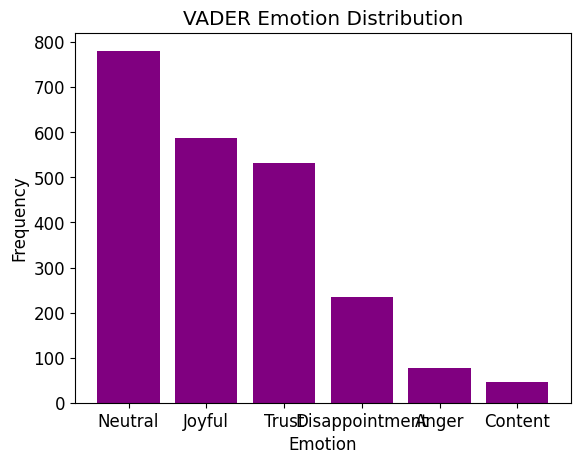

In [24]:
# Count the occurrences of each emotion
emotion_counts = df['VADER_emotion'].value_counts()

# Plot bar chart
plt.bar(emotion_counts.index, emotion_counts.values, color = 'purple')
plt.title("VADER Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.show()


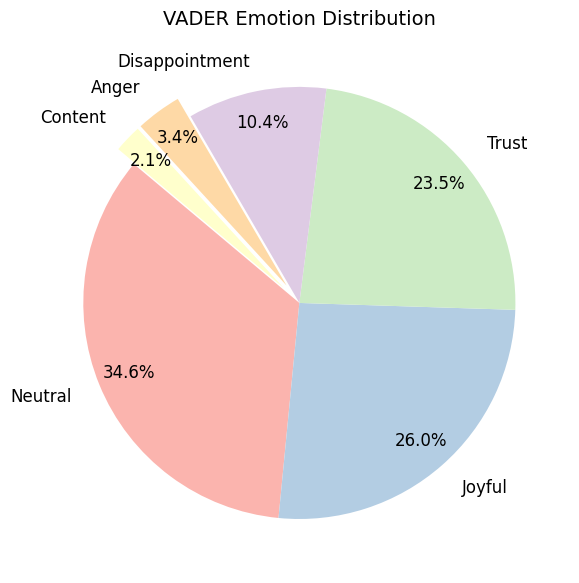

In [25]:
# Sort the data to rearrange the order
sorted_emotion_counts = emotion_counts.sort_values(ascending=False)

# Define explode values for small segments after sorting
explode = [0.1 if value / sum(sorted_emotion_counts.values) < 0.05 else 0 for value in sorted_emotion_counts.values]

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size for clarity
plt.pie(
    sorted_emotion_counts.values, 
    labels=sorted_emotion_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors = plt.cm.Pastel1.colors, 
    explode=explode, 
    labeldistance=1.14,  # Adjust distance of labels
    pctdistance=0.85    # Adjust distance of percentage labels
)



# Add a title
plt.title("VADER Emotion Distribution", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


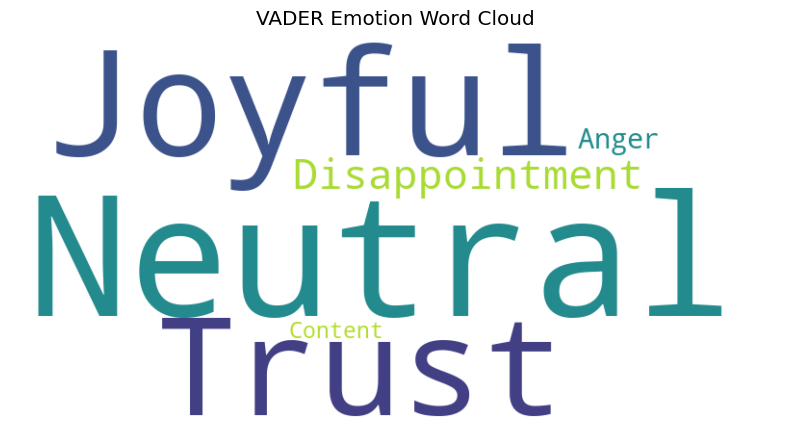

In [26]:
# Generate a word cloud for emotions
emotion_text = ' '.join(df['VADER_emotion'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(emotion_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("VADER Emotion Word Cloud")
plt.show()
